#**TPOT Setup**

In [ ]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.1 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=65b1e8b463be5f7093b53bbd442a81f1d8cee990ba86f1d3017e59c8d5dd63eb
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris=load_iris()
X_train, X_test, y_train, y_test, = train_test_split(iris.data, iris.target, train_size=0.75, test_size=0.25)
tpot= TPOTClassifier(verbosity=2, generations=5, population_size=20)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('best_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9735177865612649

Generation 2 - Current best internal CV score: 0.9735177865612649

Generation 3 - Current best internal CV score: 0.9735177865612649

Generation 4 - Current best internal CV score: 0.9735177865612649

Generation 5 - Current best internal CV score: 0.9735177865612649

Best pipeline: LogisticRegression(input_matrix, C=10.0, dual=False, penalty=l2)
0.9736842105263158


Test Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


Confusion Matrix:


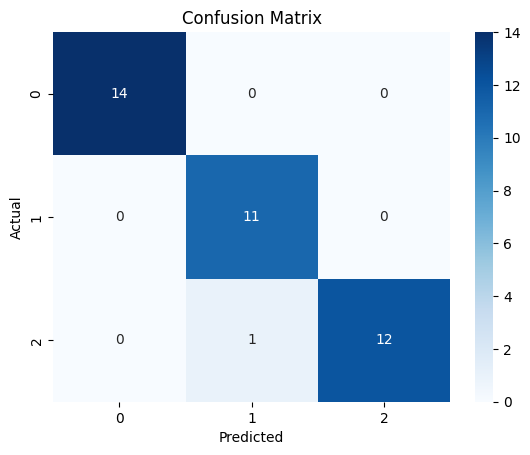


Model Comparison (Top 5 models):
Model 1: LogisticRegression(input_matrix, LogisticRegression__C=10.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
Internal CV Score: 0.9735177865612649
Pipeline: LogisticRegression(input_matrix, LogisticRegression__C=10.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)

Model 2: LogisticRegression(ZeroCount(input_matrix), LogisticRegression__C=20.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
Internal CV Score: 0.9735177865612649
Pipeline: LogisticRegression(ZeroCount(input_matrix), LogisticRegression__C=20.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)

Model 3: MLPClassifier(input_matrix, MLPClassifier__alpha=0.001, MLPClassifier__learning_rate_init=0.1)
Internal CV Score: 0.9731225296442687
Pipeline: MLPClassifier(input_matrix, MLPClassifier__alpha=0.001, MLPClassifier__learning_rate_init=0.1)

Model 4: MLPClassifier(input_matrix, MLPClassifier__alpha=0.001, MLPClassifier__

In [ ]:
# Importing necessary libraries for evaluation and visualization
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the best pipeline on the test data
y_pred = tpot.predict(X_test)
score = tpot.score(X_test, y_test)

# Print the score (accuracy)
print(f"Test Accuracy: {score}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparing models attempted by TPOT (if available in the exported pipeline)
# The tpot.evaluated_individuals_ stores information about the models and hyperparameters it tried
print("\nModel Comparison (Top 5 models):")
top_models = sorted(tpot.evaluated_individuals_.items(), key=lambda item: item[1]['internal_cv_score'], reverse=True)[:5]

for i, (model_name, model_details) in enumerate(top_models):
    print(f"Model {i+1}: {model_name}")
    print(f"Internal CV Score: {model_details['internal_cv_score']}")
    print(f"Pipeline: {model_name}\n")

# Hyperparameter tuning details of the best model
best_model = tpot.fitted_pipeline_
print("\nBest Model Hyperparameters:")
print(best_model)


## **H2O.ai Setup**

In [ ]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=466ffd0f352d04226d5ff5757cf559ee527b9faad3fb88eb6a2a6711180e6b5c
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

# Load dataset (as an example)
data = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv")

# Split dataset into training and test sets
train, test = data.split_frame(ratios=[.8])

# Define AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1)

# Train the model
aml.train(y="class", training_frame=train)

# View the leaderboard
lb = aml.leaderboard
print(lb.head())

# Evaluate the best model
perf = aml.leader.model_performance(test)
print(perf)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn7ie3uby
  JVM stdout: /tmp/tmpn7ie3uby/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn7ie3uby/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 20 days
H2O_cluster_name:,H2O_from_python_unknownUser_533kyr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███
10:06:00.560: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 118.0.

████████████████████████████████████████████████████████████| (done) 100%
model_id                                                mean_per_class_error    logloss      rmse        mse
GBM_grid_1_AutoML_1_20241020_100552_model_90                        0.017934  0.0715635  0.135642  0.0183988
GBM_grid_1_AutoML_1_20241020_100552_model_42                        0.017934  0.0660511  0.134136  0.0179925
GBM_grid_1_AutoML_1_20241020_100552_model_35                        0.017934  0.0694338  0.139228  0.0193844
StackedEnsemble_AllModels_3_AutoML_1_20241020_100552                0.017934  0.255631   0.254258  0.0646471
GBM_grid_1_AutoML_1_20241020_100552_model_58                        0.017934  0.0729556  0.130079  0.0169207
G